In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv(r"C:\Users\yedhu\Downloads\StudentsPerformance.csv")

In [3]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


# Q NO:1 Find out how many males and females participated in the test.

In [4]:
gender_counts = data['gender'].value_counts()

In [5]:
gender_counts

female    518
male      482
Name: gender, dtype: int64

# 2. What do you think about the students' parental level of education?

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
# Calculating the count of each parental education level
parental_education_counts = data['parental level of education'].value_counts()
parental_education_counts

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [8]:
# Calculate the percentage of each parental education level
parental_education_percentages = data['parental level of education'].value_counts(normalize=True) * 100
parental_education_percentages

some college          22.6
associate's degree    22.2
high school           19.6
some high school      17.9
bachelor's degree     11.8
master's degree        5.9
Name: parental level of education, dtype: float64

In [9]:
#Visualizing the data
import seaborn as sns
import matplotlib.pyplot as plt

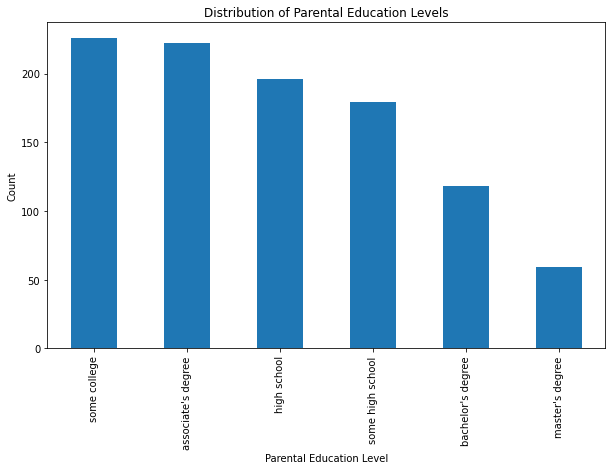

In [10]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
parental_education_counts.plot(kind='bar')
plt.title("Distribution of Parental Education Levels")
plt.xlabel("Parental Education Level")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

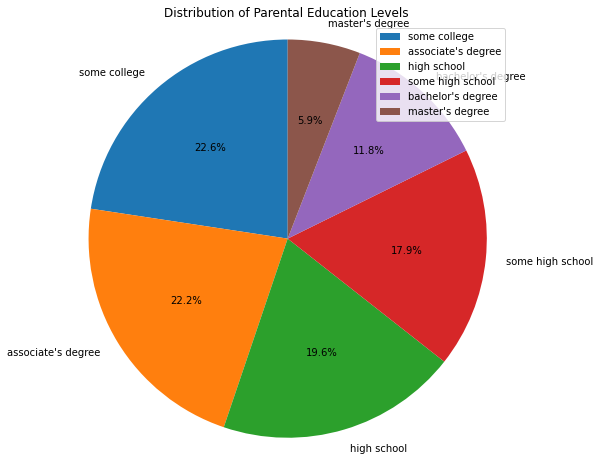

In [11]:
# Plotting the pie chart
plt.figure(figsize=(8, 8))
parental_education_counts.plot(kind='pie', autopct='%1.1f%%',startangle=90)
plt.title("Distribution of Parental Education Levels")
plt.ylabel("")
plt.legend(parental_education_counts.index, loc="best")
plt.axis('equal')
plt.show()

# 3. Who scores the most on average for math, reading and writing based on Gender and Test preparation course

In [12]:
# Calculating  average scores based on gender
gender_avg_scores = data.groupby('gender')[['math score', 'reading score', 'writing score']].mean()
gender_avg_scores

,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


#Females scores the most on average for reading and writing while males on math score.

In [13]:
# Calculating  average scores based on test preparation course
test_prep_avg_scores = data.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean()
test_prep_avg_scores

,math score,reading score,writing score
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


#The students who have completed the test preparation course scores the most on average for math, reading and writing

# 4. What do you think about the scoring variation for math, reading and writing based on Gender and Test preparation course

In [14]:
# Calculating the standard deviation of scores based on gender
gender_std_scores = data.groupby('gender')[['math score', 'reading score', 'writing score']].std()
gender_std_scores

,math score,reading score,writing score
gender,,,
female,16.029928,14.411018,14.844842
male,14.556411,14.149594,14.227225


#The females have a higher scoring variation on math score and the males have higher scoring variation in reading and writing

In [15]:
## Calculating the standard deviation of scores based on test preparation course
test_prep_std_scores = data.groupby('test preparation course')[['math score', 'reading score', 'writing score']].std()
test_prep_std_scores

,math score,reading score,writing score
test preparation course,,,
completed,14.521847,13.537572,13.236412
none,15.705689,14.608896,15.041667


#The students who have completed the test preparation course have less scoring variation in all the three. ie;math, reading and writing 

# 5. The management needs your help to give bonus points to the top 25% of students based on their math score, so how will you help the management to achieve this.

In [16]:
# Calculating the math score cutoff for the top 25% of students
math_score_cutoff = data['math score'].quantile(0.75)
math_score_cutoff

77.0

In [17]:
# Identifying the students with a math score higher than or equal to the cutoff
top_students = data[data['math score'] >= math_score_cutoff]
top_students

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
414,female,group A,high school,free/reduced,completed,77,88,85
415,female,group B,master's degree,free/reduced,completed,77,97,94
416,female,group B,bachelor's degree,free/reduced,none,77,85,87
417,female,group B,master's degree,standard,none,77,90,84
418,female,group B,high school,standard,completed,77,82,89
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


In [18]:
# Assigning bonus points to the selected students using .loc
#I have given 5 bonus points to the selected students on math score, reading and writing
top_students.loc[:, 'math score'] += 5
top_students.loc[:, 'reading score'] += 5
top_students.loc[:, 'writing score'] += 5
top_students

C:\Users\yedhu\AppData\Local\Temp\ipykernel_18116\1573674652.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_students.loc[:, 'math score'] += 5
C:\Users\yedhu\AppData\Local\Temp\ipykernel_18116\1573674652.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_students.loc[:, 'reading score'] += 5
C:\Users\yedhu\AppData\Local\Temp\ipykernel_18116\1573674652.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
414,female,group A,high school,free/reduced,completed,82,93,90
415,female,group B,master's degree,free/reduced,completed,82,102,99
416,female,group B,bachelor's degree,free/reduced,none,82,90,92
417,female,group B,master's degree,standard,none,82,95,89
418,female,group B,high school,standard,completed,82,87,94
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,104,92,86
996,male,group A,some college,standard,completed,105,101,91
997,male,group D,some college,standard,completed,105,102,104
998,male,group E,associate's degree,free/reduced,completed,105,105,98
